# Exam assignment

1. Træne en model til at kunne gennemskue, om et review er positivt eller negativt baseret på tekstindholdet (classification & natural language processing)
2. Gruppere mest populære ord i positive og negative reviews, og visualisere det
3. Sammenligne den trænede model mod det rigtige datasæt, for at se hvor nøjagtig den er ift. Datasættet
4. Se om der er en sammenhæng mellem længde af review og rating
5. Fordi datasættets format er simpel, kan vi webscrape reviews fra andre sider, og bruge vores trænede model på dem for at se, om den kan genneskue
Om reviewet er positivt eller negativt.


## imports

In [1]:
pip install fasttext termcolor wget

Processing /home/jovyan/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b/fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl
Processing /home/jovyan/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02/wget-3.2-py3-none-any.whl
  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 1. Træne en model til at kunne gennemskue, om et review er positivt eller negativt baseret på tekstindholdet (classification & natural language processing)

In [1]:
from modules import model

# Takes a long time to run

model.download_dataset()

model.extract_dataset()

model.clean_dataset() 

model.train_autotune(600) 

model.test_model("model/trained_review_model.bin")

model.predict_with_model(
    [
        ("The ps5 dual sense controller is comfortable its a mix between an Xbox elite series 2 controller and a ps4 dualshock controller i got it to work on pc but sadly can't test out rumble features", 5),
        ("Controller came in today. It does not come with any USB-C cable, which is a bummer, but not unexpected. I could not get it to work on my PS4 via wired connection, but it does work for some reason on the PS3. Was able to play some PS3 games with the controller (not all games work), only thing that fails to function on the PS3 is the home button and the vibration. Feels comfortable to play on and fits right in the palms of my hands. Looking forward to using it on an actual PS5 :)", 4),
        ("The process of buying the vehicle was super smooth and easy. On that I have no complaints. My complaint is two fold, I sold them a vehicle that had brand new tires and an oil change. The vehicle I bought is now sitting at 45% oil life, so they didnt change the oil that is lame, every vehicle that is being sold shouldve had an oil change prior to being sold. The tire issue is the hardest and I wasn't going to say a thing until I seen the oil life. So the tires on the vehicle I bought have about 25 to 30% tread life left, the vehicle I sold them had 95%+.", 3),
        ("Great idea, but super slow. Trying to buy a car was a long painful process. They are constantly on their iPad trying to communicate with other people. Took forrreeevvvver.", 2),
        ("The controller is great!! Feels great and is loaded with cool new features...but then you have Sony customer service. A button started to malfunction on the controller that was about a month old. I called Sony up and instead of apologizing profusely and sending a prepaid postage to get it fixed or just replacing it, I got an email saying I’m responsible for shipping costs. Way to stand by your product!!! You made a device that malfunctioned...why not put a burden on the consumer to ship your crap back to you. Bad, bad Sony. I’m buying an XBOX.", 1),
    ], "trained_review_model_0.90.bin", True)

model.get_model_args("model/trained_review_model_0.90.bin")

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Download complete.
Extracting dataset...
Extraction complete.


### 2. Gruppere mest populære ord i positive og negative reviews, og visualisere det

In [1]:
from modules import pop_words

one_star, two_stars, three_stars, four_stars, five_stars = pop_words.prepare_category_dfs("dataset/train.csv")

In [2]:
# choose which reviews to clean up 
cleaned_reviews = pop_words.clean_reviews(five_stars)

100%|██████████| 600000/600000 [04:02<00:00, 2473.48it/s]


Generating wordcloud...
Saving wordcloud image in images folder.
5_stars wordcloud


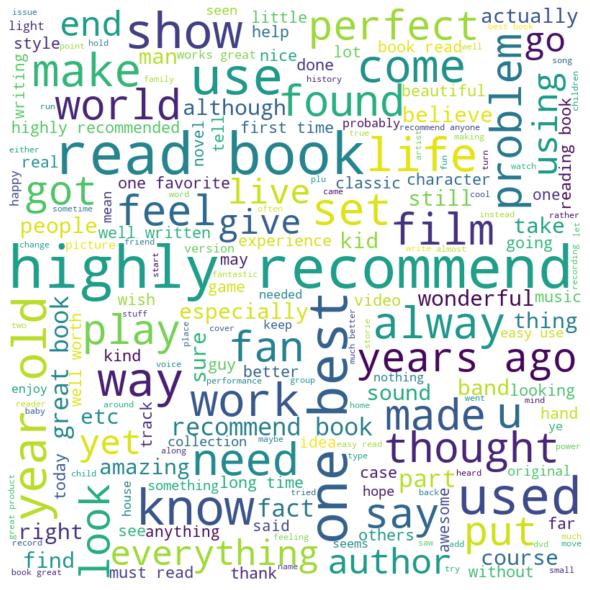

In [3]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# name will be used to save wordcloud image
name = "5_stars"
all_words = ""

for review in cleaned_reviews:
    all_words += " ".join(review) + " "

print("Generating wordcloud...")
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_words)

print("Saving wordcloud image in images folder.")
wordcloud.to_file("images/" + name + "_wordcloud.png")

print(name + " wordcloud")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


1_star_wordcloud.png



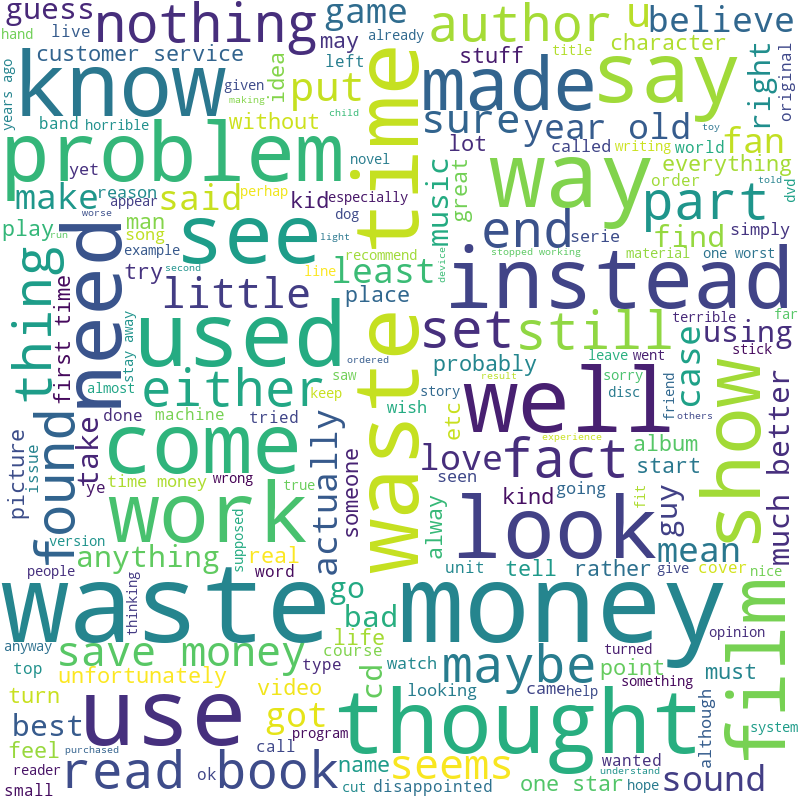





2_stars_wordcloud.png



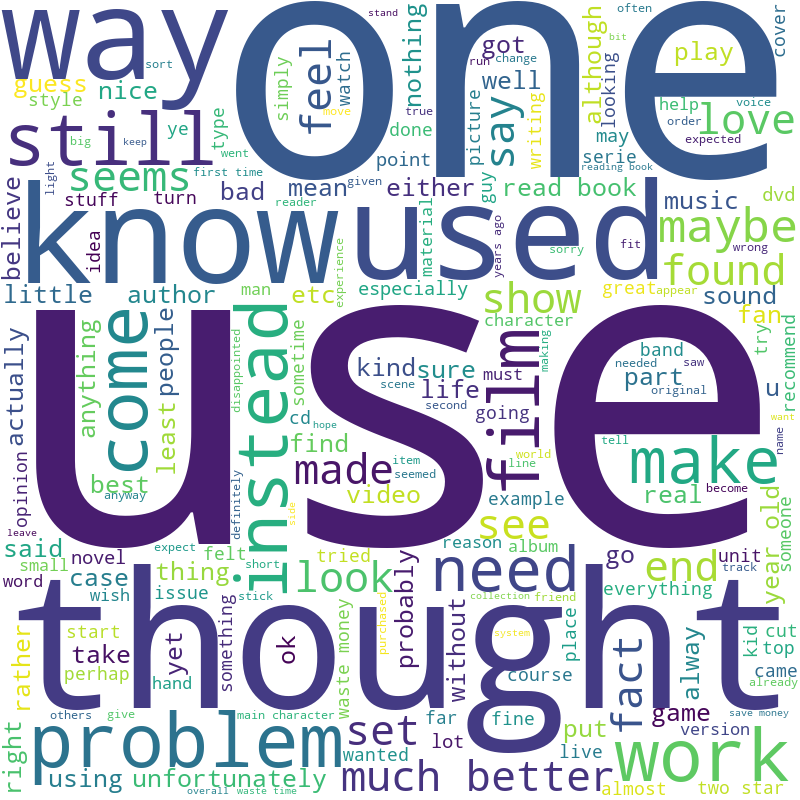





3_stars_wordcloud.png



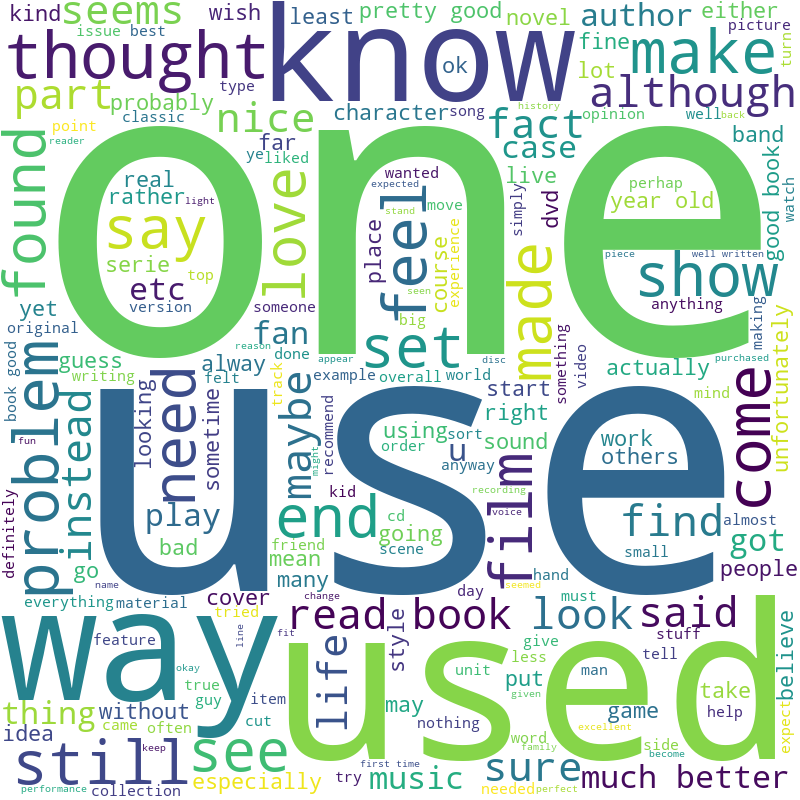





4_stars_wordcloud.png



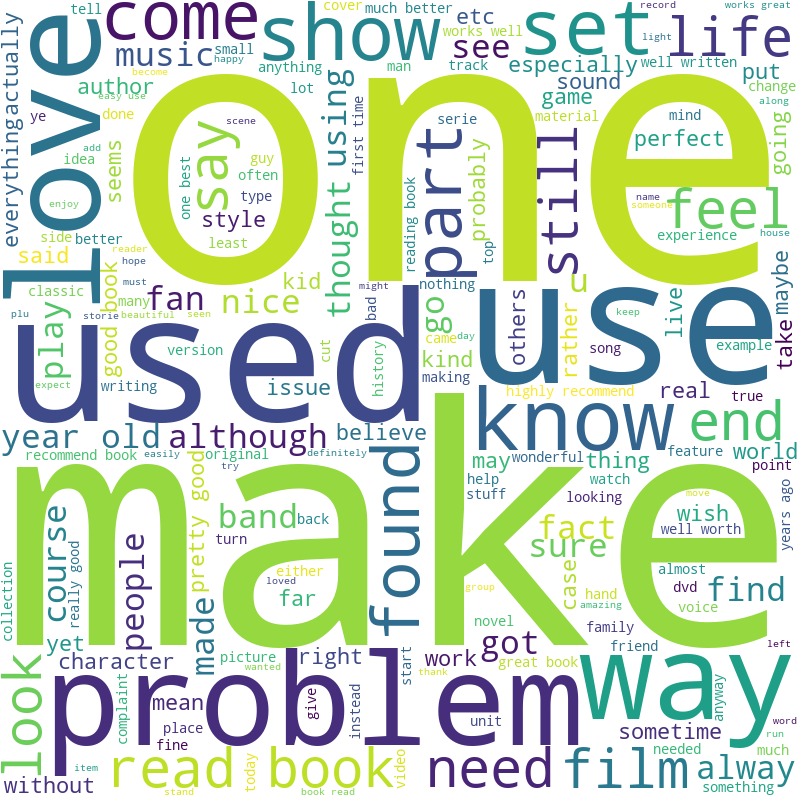





5_stars_wordcloud.png



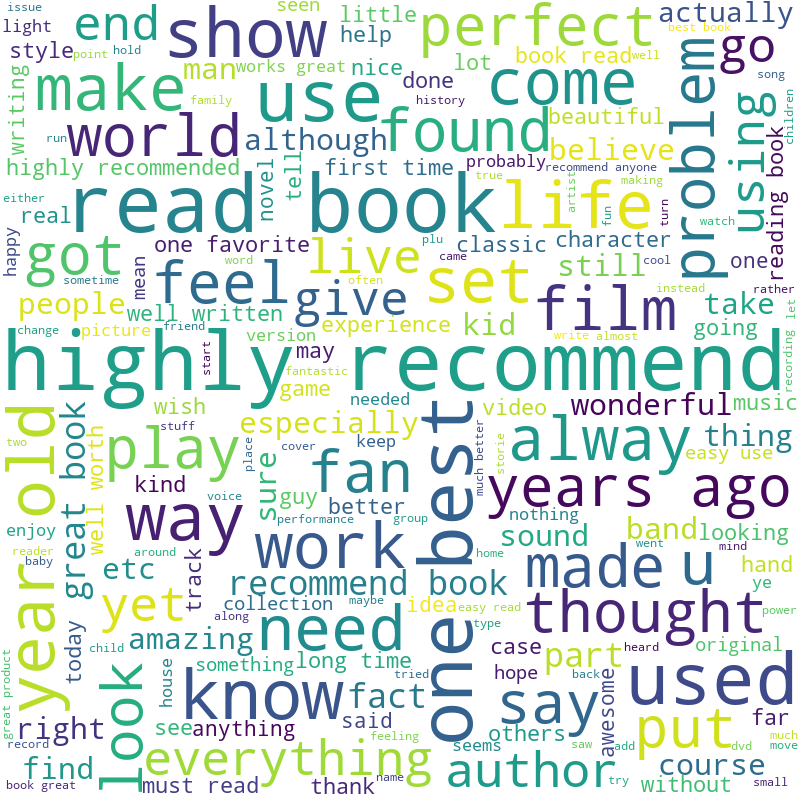

In [4]:
from IPython.display import Image, display 

img_names = ["1_star_wordcloud.png", "2_stars_wordcloud.png", "3_stars_wordcloud.png", "4_stars_wordcloud.png", "5_stars_wordcloud.png"]
for img in img_names:
    print("\n" + img + "\n")
    display(Image(filename="images/" + img))
    print("\n\n")

### 3. Sammenligne den trænede model mod det rigtige datasæt, for at se hvor nøjagtig den er ift. Datasættet

In [7]:
from modules import model

model.download_model_with_90_precision()

model.test_model("model/trained_review_model_0.90.bin")

model.get_model_args("model/trained_review_model_0.90.bin")

model.predict_with_model(
    [
        ("Great mattress protector! It truly does protect my mattress from liquids and it’s soft, easy to clean and I haven’t had any issues with it! This order is actually my second order of this product because I liked it so much I bought more for other mattresses in my house!", 5),
        ("Controller came in today. It does not come with any USB-C cable, which is a bummer, but not unexpected. I could not get it to work on my PS4 via wired connection, but it does work for some reason on the PS3. Was able to play some PS3 games with the controller (not all games work), only thing that fails to function on the PS3 is the home button and the vibration. Feels comfortable to play on and fits right in the palms of my hands. Looking forward to using it on an actual PS5 :)", 4),
        ("This mattress pad is like a terry clothe, I wasn't expecting that when it came in the mail. Last night we had our first accident and it did absorb most of it, however the mattress did get a little wet. Not sure if that's just typical with some mattress pads (this is my first one) but I was a little disappointed. I will probably be purchasing a different brand to see if it works better.", 3),
        ("Overall, I thought I would try this out because it had decent reviews and it was pretty cheap. Problem is it slept way too hot and had a tendency to slide around (not to mention the noise it makes going so) on the surface of the mattress making something like sitting up in bed against the wall highly uncomfortable. I assume it would do a really good job of protecting the mattress from liquids, but without having incontinence issues, I can't see any use for us to keep this.", 2),
        ("Urine/liquid DOES penetrate through....so that defeats its purpose. We even hang dry these after a wash (obnoxiously tedious). So....what we end up doing now is placing a pee MAT on top of this yet underneath the regular fitted sheet to catch the urine of our kids. WASTE OF MONEY, TIME AND ENERGY. Strongly don’t recommend.", 1),
    ], "trained_review_model_0.90.bin", True)

Model already downloaded.
Testing model...


ValueError: Test file cannot be opened!

### 4. Se om der er en sammenhæng mellem længde af review og rating

In [8]:
from modules import correlationLength

correlationLength.doWork()

Ratings: 1
408.8041
Ratings: 2
441.55343833333336
Ratings: 3
430.66780166666666
Ratings: 4
413.76461333333333
Ratings: 5
375.36374333333333


### 5. Fordi datasættets format er simpel, kan vi webscrape reviews fra andre sider, og bruge vores trænede model på dem for at se, om den kan genneskue

In [ ]:
import model
import bs4
import requests


def getReviews(url, reviewArray=[]):
        base_url = 'https://www.trustpilot.com'
        html = requests.get(url)
        txt = html.text
        soup = bs4.BeautifulSoup(txt, 'html.parser')
        review_text = soup.select('p[class=review-content__text]')
        stars = soup.select('div[class="star-rating star-rating--medium"] > img')


        for i, r in enumerate(review_text):
            if(stars[i]["alt"][0:1].isdigit()):
                setence = model.clean_setence(r.getText())
                reviewArray.append((setence, int(stars[i]["alt"][0:1])))


        nextpage = soup.select('a[class="button button--primary next-page"]')
        
        if(len(nextpage) == 0):
            return reviewArray
        print(len(reviewArray))
        return getReviews(base_url + nextpage[0]['href'], reviewArray)

    

urls = [
    'https://www.trustpilot.com/review/www.europark.dk',
    'https://www.trustpilot.com/review/www.1stdibs.com',
    'https://www.trustpilot.com/review/www.oakmotors.com',
    'https://www.trustpilot.com/review/www.brighterblooms.com',
    'https://www.trustpilot.com/review/www.vrbo.com',
    'https://www.trustpilot.com/review/www.teleflora.com'
]

resultArray = []

for url in urls:
    print(url)
    reviewArray = getReviews(url, [])
    resultArray = resultArray + reviewArray
    


model.predict_with_model(resultArray, "trained_review_model_0.90.bin", False)